<a href="https://colab.research.google.com/github/nani18012/front-end/blob/main/Latihan_In_Case_Nani_Awalia_Summit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Nama : Nani Awalia**
**Kelas : Summit**

**Universitas Singaperbangsa Karawang**

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline

# **Load Data Set**

In [96]:
#Load data penjualan
df = pd.read_csv('/content/austin_weather.csv')
df = df.drop('Events',1)
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T


# **Membersihkan Data**

In [97]:
df['PrecipitationSumInches'] = df['PrecipitationSumInches'].apply(lambda x: x if x == 'T' else 'F')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,F
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,F
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,F
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,F
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

Dari method info ini bisa lihat kalau kolom yang bertipe data numerik hanya kolom TempHighF, TempAvgF, TempLowF, maka harus diubah ke numerik dahulu karena untuk standar scaler atau normalisai harus numerik semua, dan kolom date bisa kita ga gunakan

In [99]:
np.array(df.iloc[:,4:]) == '-'

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [101]:
kolom = df.columns[4:19]
for i in kolom:
  df[i] = df[i].apply(lambda x: 0 if x == '-' else x)

df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,F
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,F
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,F
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,F
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,30.04,29.97,29.88,10,10,10,12,5,21,F
1315,2017-07-28,105,91,76,71,64,55,87,54,20,29.97,29.9,29.81,10,10,10,14,5,20,F
1316,2017-07-29,107,92,77,72,64,55,82,51,19,29.91,29.86,29.79,10,10,10,12,4,17,F
1317,2017-07-30,106,93,79,70,68,63,69,48,27,29.96,29.91,29.87,10,10,10,13,4,20,F


In [103]:
df.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches'],
      dtype='object')

# **Visualisasi dan Analisis Data**

In [104]:
df['PrecipitationSumInches'].value_counts()

F    1195
T     124
Name: PrecipitationSumInches, dtype: int64

**1195 bernilai False dan 124 bernilai T**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0798f77ad0>]],
      dtype=object)

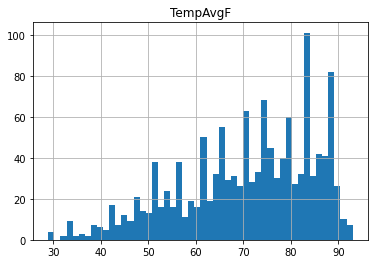

In [105]:
df.hist(column='TempAvgF', bins=50)

# **Feature set**

In [106]:
df.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches'],
      dtype='object')

In [110]:
X = df.drop('PrecipitationSumInches', 1).values
X[0:5]

array([['2013-12-21', 74, 60, 45, '67', '49', '43', '93', '75', '57',
        '29.86', '29.68', '29.59', '10', '7', '2', '20', '4', '31'],
       ['2013-12-22', 56, 48, 39, '43', '36', '28', '93', '68', '43',
        '30.41', '30.13', '29.87', '10', '10', '5', '16', '6', '25'],
       ['2013-12-23', 58, 45, 32, '31', '27', '23', '76', '52', '27',
        '30.56', '30.49', '30.41', '10', '10', '10', '8', '3', '12'],
       ['2013-12-24', 61, 46, 31, '36', '28', '21', '89', '56', '22',
        '30.56', '30.45', '30.3', '10', '10', '7', '12', '4', '20'],
       ['2013-12-25', 58, 50, 41, '44', '40', '36', '86', '71', '56',
        '30.41', '30.33', '30.27', '10', '10', '7', '10', '2', '16']],
      dtype=object)

# **Definisikan Labelnya juga (Y)**

In [108]:
Y = df['PrecipitationSumInches'].values
Y[0:5]

array(['F', 'F', 'F', 'F', 'T'], dtype=object)

# **Normalisasi Data**

In [109]:
'-' in X[:,1:]

False

In [111]:
X = preprocessing.StandardScaler().fit(X[:,1:]).transform(X[:,1:].astype(float))
X[0:5]

array([[-0.46492853, -0.75801089, -1.05059398,  0.40741835, -0.47667524,
        -0.46284364,  0.45571608,  0.66282914,  0.71041032, -0.12707796,
        -0.19064139, -0.19065322,  0.10318467, -1.22835976, -1.28356082,
         1.9621461 , -0.47810712,  1.62034133],
       [-1.68436437, -1.61267654, -1.47356802, -1.27519551, -1.32183605,
        -1.36879552,  0.45571608,  0.11237929, -0.11092934,  0.25336403,
         0.12175218,  0.00430759,  0.10318467,  0.54429508, -0.47761824,
         0.80598318,  0.47738272,  0.61718235],
       [-1.5488715 , -1.82634295, -1.96703774, -2.11650245, -1.90694739,
        -1.67077947, -1.01690557, -1.1457918 , -1.04960323,  0.35712094,
         0.37166703,  0.38030344,  0.10318467,  0.54429508,  0.86561941,
        -1.50634267, -0.95585205, -1.55632879],
       [-1.34563219, -1.75512081, -2.03753341, -1.76595789, -1.84193502,
        -1.79157306,  0.10921687, -0.83124903, -1.34293882,  0.35712094,
         0.34389871,  0.3037117 ,  0.10318467,  0.544

# **Pembagian Data Training dan Testing**

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

print("Train set : ", X_train.shape, Y_train.shape)
print("Test set : ", X_test.shape, Y_test.shape)

Train set :  (1055, 18) (1055,)
Test set :  (264, 18) (264,)


# **Klasifikasi**

# **K nearest neighbor (K-NN)**

In [115]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

# **Predicting**

In [116]:
y_pred = knn.predict(X_test)
y_pred[0:5]

array(['F', 'F', 'F', 'F', 'F'], dtype=object)

# **Perhitungan Akurasi**

In [119]:
from sklearn import metrics

print("Train set Accuracy : ", metrics.accuracy_score(Y_train, knn.predict(X_train)))
print("Test set Accuracy  : ", metrics.accuracy_score(Y_test, y_pred))

Train set Accuracy :  0.9213270142180094
Test set Accuracy  :  0.875


# **MENCARI NILAI TERBAIK**

In [120]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, y_pred)

    
    std_acc[n-1]=np.std(y_pred==Y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875])

# **Lalu kita juga bisa menampilkan grafik / plot-nya**

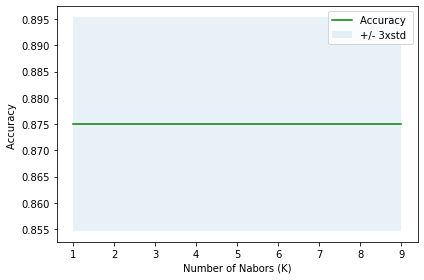

In [121]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [122]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


The best accuracy was with 0.875 with k= 1
